In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
total = df_train.isnull().sum()
percent = (df_train.isnull().sum()/df_train.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by= "Total", ascending=True)
missing_data.loc[missing_data.Total > 0]

,Total,Percent
Electrical,1,0.000685
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
GarageQual,81,0.055479
GarageFinish,81,0.055479


In [5]:
feature = "Electrical"
df_train.loc[df_train[feature].isnull()][["SalePrice"]]

,SalePrice
1379,167500


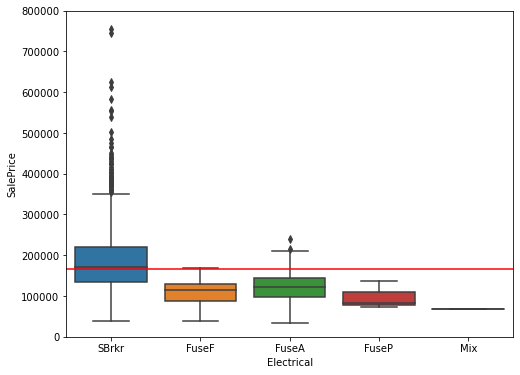

In [6]:
data = pd.concat([df_train['SalePrice'], df_train[feature]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=feature, y='SalePrice', data=data)
ax.axis(ymin=0, ymax=800000);
for null_price in df_train.loc[df_train[feature].isnull()]['SalePrice'].unique():
    ax.axhline(y=null_price, color='r', linestyle='-')

### Price of null row of electrical is equal to 167500
* it is almost equal to median of SBrkr
* it is almost equal to max of FuseF
* it is between upper quartile and max of FuseA
* it is higher than FuseP and Mix

*so it can be said that the Null row of electrical is SBrkr*

In [7]:
cond = (df_train[feature].isnull()) & (df_train['SalePrice'] == 167500)
df_train.loc[cond] = "SBrkr"
df_train[feature].isna().sum()

0